# Problema 2:
Considere el entramado mostrado en la figura, con una fuerza aplicada de 20 kN. Calcule los desplazamientos de cada uno de los nodos y las tensiones que sufre cada elemento. Todos los elementos tienen E = 210 GPa y una sección de 10 cm2, excepto el elemento 3, que tiene una sección de 20 cm2. Los elementos 2 y 5 tienen una longitud de 8 metros y el elemento 3 de 4 metros.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def loc_a_glob (z):
    z=z*np.pi/180
    c=np.cos(z)
    s=np.sin(z)
    K=[[ c**2,    c*s ,   -c**2, -c*s] , 
       [ c*s,      s**2,   -c*s, -s**2] , 
       [-c**2,    -c*s,    c**2,  c*s], 
       [-c*s,     -s**2,    c*s,   s**2]]
    return np.array(K)

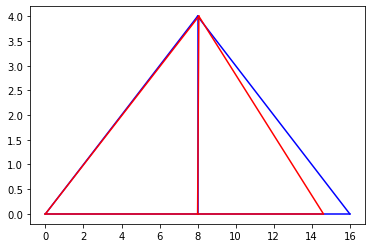

In [47]:
N = 4                      # cantidad de nodos = cantidad de elementos -1
E = np.ones(N+1)*210e9           # Módulo elástico de cada elemento GPa
A = np.ones(N+1)*10e-4          # Area de cada elementos cm2
A[2] = 20e-4
L = np.array([0, 8, 4, 0, 8])  # Longitud de cada elemento cm
GL = 2                               # Grados de libertad

MN = [[0,0] , [L[1],L[2]] , [L[1]+L[4],0] , [L[1],0]]  # MAtriz de nodos (posiciones de los nodos) (ejercicio)

MC = [ [0,1] , [3,0] , [3,1] , [1,2], [2, 3]  ]      # Matriz de conectividad de elementos (el  elemento 0: entre nodo 0: MN[0] y nodo 1 MN[1])  ) (ejercicio)


ff=np.array([[2,0], [4,0], [7,-20000], [6,0]]) # columnas: nodo y eje - filas: valor de fuerza conocido

# no hice una matriz de datos desplazamientos pq son todos ceros, cuando el codigo funcione, lo generalizo.

u = np.zeros(N*GL)


K = np.zeros([N*GL,N*GL])     # Matriz rigidez GLOBAL kN/m



for i in range(len(MC)):
    dx= MN[MC[i][0]][0] - MN[MC[i][1]][0]
    dy = MN[MC[i][0]][1] - MN[MC[i][1]][1]
    dL=np.sqrt( dx ** 2 + dy ** 2 )
    k=E[i]*A[i]/dL    
    z=np.arctan2(dy,dx)          # Creo que el error esta acá o en R
    R=k*loc_a_glob(z)  # Matriz de rigidez local rotada
    #R[np.abs(R/np.max(R)) < 1e-12] =0
    n1=MC[i][0]*2                #index nodo 1 en x del elemento i
    n2=MC[i][1]*2                #index nodo 2 en x del elemento i
    for j in MC[i]:
        for l in MC[i]:    
            n1=j*GL
            n2=l*GL
            p=MC[i].index(j)
            t=MC[i].index(l)
            K[n1:n1+GL,n2:n2+GL]+=R[p:p+GL,t:t+GL]


'''
    n1=MC[i][0]*2                #index nodo 1 en x del elemento i
    n2=MC[i][1]*2                #index nodo 2 en x del elemento i
    K[n1:n1+2,n1:n1+2]+=R[0:2,0:2]
    K[n1:n1+2,n2:n2+2]+=R[0:2,2:4]
    K[n2:n2+2,n1:n1+2]+=R[2:4,0:2]
    K[n2:n2+2,n2:n2+2]+=R[2:4,2:4] '''



#Condiciones de contorno:
'''
kk=np.zeros((len(ff),len(ff)))   #Matriz reducida para calcular desplazamientos desconocidos
for i in range(len(ff)):
    for j in range(len(ff)):
        kk[i, j]=K[ff[i,0], ff[j,0]]
uu=np.linalg.solve(kk, ff[:,1]) '''

I = np.linspace(0,7,8).astype(int) 
s = np.delete( I , ff[:,0] )

uu = np.linalg.solve(K[np.ix_(ff[:,0], ff[:,0])], ff[:,1]-K[np.ix_(ff[:,0], s)].dot(u[s]) )

for i in range(len(ff)):
    u[ff[i,0]]=uu[i]


F=K.dot(u)
F[np.abs(F) < 1e-8 ]  = 0
u[np.abs(u) < 1e-8 ]  = 0

for i in MC:    
    plt.plot([MN[i[0]][0], MN[i[1]][0]], [MN[i[0]][1], MN[i[1]][1]], "b")

MNfinal=copy.copy(MN)
for i in range(len(MN)-1):  
    MNfinal[i][0]+=u[i*2]
    MNfinal[i][1]+=u[i*2+1]

for i in MC:    
    plt.plot([MNfinal[i[0]][0], MNfinal[i[1]][0]], [MNfinal[i[0]][1], MNfinal[i[1]][1]], "r")


In [51]:
F,u,s, ff[:,0]

(array([ -71745.27972878,  762467.73137221,       0.        ,
        -686550.00629492,       0.        ,  -17460.958225  ,
              0.        ,  -20000.        ]),
 array([ 0.        ,  0.        ,  0.06547457,  0.        , -1.38390144,
         0.        , -0.02891855, -1.38387033]),
 array([0, 1, 3, 5]),
 array([2, 4, 7, 6]))

Fuerzas  
1.455191522836685181e-11
9.999999999999978172e+03
0.000000000000000000e+00
0.000000000000000000e+00
0.000000000000000000e+00
9.999999999999978172e+03
0.000000000000000000e+00
-2.000000000000000000e+04

Desplazamientos
0.000000000000000000e+00
0.000000000000000000e+00
7.619047619047598658e-04
-3.653398073809314972e-03
1.523809523809519732e-03
0.000000000000000000e+00
7.619047619047598658e-04
-3.843874264285505535e-03

In [56]:
K[np.ix_(ff[:,0], s)].dot(u[s])

array([0., 0., 0., 0.])

# Confirmación de suma de rigidez local en la global:

x=np.array([[1,1,1,1], [2,2,2,2],[3,3,3,3],[4,4,4,4]])
y=np.array([[5,5,5,5], [6,6,6,6],[7,7,7,7],[8,8,8,8]])
z=np.array([[9,9,9,9], [10,10,10,10],[12,12,26,26],[13,13,25,25]])

K = np.zeros([6,6])  
e=[x,y,z]
MC=[[0,1],[1,2],[2,0]]
for i in range(len(MC)): 
    K0=copy.copy(K)
    n1=MC[i][0]*2
    n2=MC[i][1]*2
    if i==0:
        kLoc=x
    elif i==1:
        kLoc=y
    else:
        kLoc=z
    K[n1:n1+2,n1:n1+2]+=kLoc[0:2,0:2]
    K[n1:n1+2,n2:n2+2]+=kLoc[0:2,2:4]
    K[n2:n2+2,n1:n1+2]+=kLoc[2:4,0:2]
    K[n2:n2+2,n2:n2+2]+=kLoc[2:4,2:4]
    print(K-K0)